In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Features that will be extracted from the EM data and their shorter handle
wx__params = {
    "temperature_air_mean_200": "temp",
    "wind_speed": "wind",
    "pressure_air_site": "press",
    # "precipitation_height": "precip",
    "sunshine_duration": "sun"
}
outlier_columns=["01228", "02429", "04039", "00656", "00954", "03897", "03946", "00603"]
na_columns = ["00769", "00850", "02437", "00769", "00850", "02303",	"02437", "02564", "03513", "04371"]
# Concatenate all weather parameters into one data frame
wx__dict = {}
for name, handle in wx__params.items():
    wx__dict[handle]=(pd.read_pickle("../data/weather_all_stations/cleaned/"+name+".pkl")).drop(columns=outlier_columns+na_columns)

df = pd.concat(wx__dict.values(), axis=1, ignore_index=False, verify_integrity=True, keys=wx__dict.keys())
df.head()

temp                                          \
                            00102   00161   00164   00183   00198   00232   
2017-01-01 00:00:00+00:00  278.35  268.75  276.65  277.45  270.65  269.45   
2017-01-01 01:00:00+00:00  278.25  268.85  276.75  277.65  270.25  269.25   
2017-01-01 02:00:00+00:00  278.25  269.25  277.05  277.85  269.45  269.05   
2017-01-01 03:00:00+00:00  278.05  269.35  277.15  277.85  269.25  268.55   
2017-01-01 04:00:00+00:00  278.15  269.45  277.55  277.95  268.85  267.85   

                                                           ...   sun        \
                            00282   00298   00303   00342  ... 04177 04271   
2017-01-01 00:00:00+00:00  262.35  277.75  274.75  275.65  ...   0.0   0.0   
2017-01-01 01:00:00+00:00  262.75  277.75  274.65  275.15  ...   0.0   0.0   
2017-01-01 02:00:00+00:00  261.35  277.75  274.35  274.65  ...   0.0   0.0   
2017-01-01 03:00:00+00:00  261.15  277.95  274.55  274.25  ...   0.0   0.0   
2017-01-01 04:00:00+00:00  261.35  277.85  274.75  274.45  ...   0.0   0.0   

                                                                           
                          04336 04393 04464 04466 04501 04625 04642 04745  
2017-01-01 00:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 01:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 02:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 03:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 04:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 468 columns]

In [121]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [122]:
from sklearn.decomposition import PCA
latent_dim = 8
# keep the latent_dim at 10, and put your solution below this line:
# YOUR CODE HERE
wx_pca=PCA(n_components=latent_dim)
#print(interpolated_data.reshape(29,202))
wx_pca_results=wx_pca.fit(X)
print(wx_pca_results.components_.shape)


(8, 468)


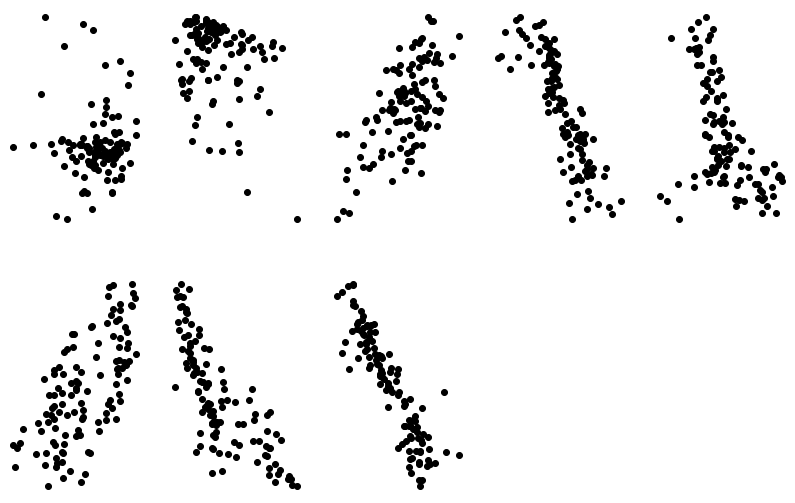

In [123]:

fig, axes = plt.subplots((latent_dim ) // 5 + 1, min(latent_dim,5),figsize=(14,9))
fig.patch.set_visible(False)

for i, ax in enumerate(axes.flat):
    if i < wx_pca_results.components_.shape[0]:
        ax.scatter(wx_pca_results.components_[i].reshape(df.columns.levshape)[0], 
                wx_pca_results.components_[i].reshape(df.columns.levshape)[2], 
                lw=1, color="black")
    ax.axis('off')

In [124]:
components = wx_pca.transform(X)
projected = wx_pca.inverse_transform(components)
print(projected.shape)
print(components.shape)

(43824, 468)
(43824, 8)


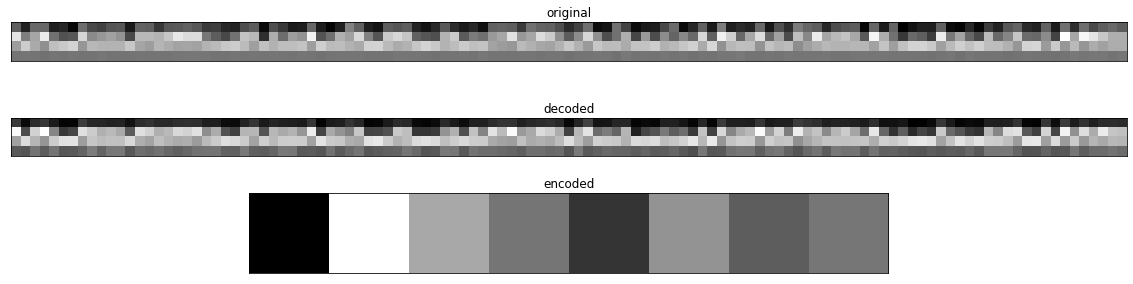

In [125]:
def plot_pca(X, decoded_imgs, encoded_imgs):
  n = 1
  offset=5
  plt.figure(figsize=(20,5))

  for i in range(n):
    # display original
    ax = plt.subplot(3*n, 1, i + 1)
    # plt.imshow(scaler.inverse_transform(df.reshape(df_test.shape))[i+offset].reshape(df.shape[1:]))
    plt.imshow(X[i+offset].reshape(df.columns.levshape))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3*n, 1, i + 2)
    plt.imshow(decoded_imgs[i+offset].reshape(df.columns.levshape))
    plt.title("decoded")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3*n, 1, i + 3)
    plt.imshow(encoded_imgs[i+offset].reshape(latent_dim,1).transpose())
    plt.title("encoded")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

plot_pca(X, projected, components)

In [126]:
PCA_df = pd.DataFrame(components, index=df.index, columns=[str(i) for i in range(components.shape[-1])])
# PCA_df.to_pickle("../data/weather/PCA_weather_SSc"+str(latent_dim)+".pkl")

<AxesSubplot:>

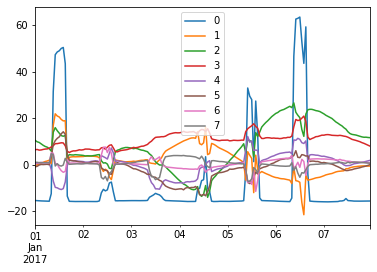

In [120]:
PCA_df.loc["2017-01-01":"2017-01-07", [str(i) for i in range(0,8)]].plot()

In [101]:
error_df=pd.DataFrame(X-projected, index=df.index, columns=df.columns)

In [102]:
error_df.describe()

temp                                                          \
              00102         00161         00164         00183         00198   
count  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04   
mean  -6.615130e-17 -3.404846e-17 -7.263672e-17 -5.512608e-17 -3.907466e-17   
std    3.196588e-01  2.681434e-01  2.371113e-01  3.201419e-01  1.898621e-01   
min   -1.679054e+00 -2.025570e+00 -1.588934e+00 -1.757524e+00 -1.726089e+00   
25%   -1.971248e-01 -1.559795e-01 -1.451099e-01 -1.891963e-01 -1.012900e-01   
50%    7.077003e-03  2.413484e-02 -2.004420e-03  1.397221e-02  1.372008e-02   
75%    2.071245e-01  1.800704e-01  1.419575e-01  2.069634e-01  1.208083e-01   
max    1.438751e+00  1.433474e+00  1.434146e+00  1.470907e+00  8.060149e-01   

                                                                             \
              00232         00282         00298         00303         00342   
count  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04   
mean  -7.539302e-18 -1.848345e-17  1.556501e-17 -3.566982e-17 -3.048148e-17   
std    2.582940e-01  2.473434e-01  3.071688e-01  2.665479e-01  2.459471e-01   
min   -1.407451e+00 -2.185929e+00 -2.706370e+00 -2.721726e+00 -2.160226e+00   
25%   -1.641764e-01 -1.465205e-01 -1.708551e-01 -1.404892e-01 -1.419893e-01   
50%    5.347226e-03  2.342415e-02  1.723479e-02  1.172390e-02  1.264412e-02   
75%    1.664130e-01  1.674559e-01  1.900203e-01  1.559246e-01  1.540775e-01   
max    1.415302e+00  1.033066e+00  1.465844e+00  1.653086e+00  1.185732e+00   

       ...           sun                                            \
       ...         04177         04271         04336         04393   
count  ...  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04   
mean   ...  4.957294e-17  4.864066e-17  6.452994e-17  8.009495e-17   
std    ...  4.889006e-01  5.206549e-01  5.360786e-01  5.501533e-01   
min    ... -2.902768e+00 -2.739931e+00 -2.911236e+00 -2.682853e+00   
25%    ... -1.410847e-01 -1.237264e-01 -1.747815e-01 -2.024706e-01   
50%    ... -2.164510e-02 -2.938712e-02 -3.879652e-02 -2.656994e-02   
75%    ...  1.155166e-01  6.632651e-02  1.514939e-01  1.711045e-01   
max    ...  2.549410e+00  2.578298e+00  2.461691e+00  2.684159e+00   

                                                                             \
              04464         04466         04501         04625         04642   
count  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04  4.382400e+04   
mean   1.167376e-16  7.652797e-17  4.701930e-18  1.477055e-16  3.664263e-17   
std    6.193673e-01  5.501488e-01  5.422338e-01  5.552721e-01  4.614380e-01   
min   -2.803428e+00 -2.812483e+00 -2.657449e+00 -3.078897e+00 -2.810898e+00   
25%   -1.613003e-01 -1.787170e-01 -9.352464e-02 -7.947599e-02 -9.813158e-02   
50%    1.867327e-02 -2.504307e-02  2.624855e-02  1.026926e-02 -4.212615e-03   
75%    1.520438e-01  1.650918e-01  1.330324e-01  9.425643e-02  8.143173e-02   
max    3.020546e+00  2.860049e+00  2.974249e+00  2.817468e+00  2.450210e+00   

                     
              04745  
count  4.382400e+04  
mean   1.047396e-16  
std    5.019752e-01  
min   -2.841448e+00  
25%   -6.366101e-02  
50%    3.253093e-02  
75%    1.001336e-01  
max    2.703226e+00  

[8 rows x 468 columns]